In [1]:
from selenium import webdriver
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select

import pandas as pd
import pickle
import os
import sys
import warnings
import time

from bs4 import BeautifulSoup
import requests
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/120.0.0.0 Safari/537.36"
    ),
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.9",
    "Referer": "https://www.ewg.org/tapwater/",
    "Connection": "keep-alive"
}

from selenium.webdriver.edge.options import Options

edge_options = Options()
edge_options.add_argument('--headless')
edge_options.add_argument("--disable-images")  # Disable images
edge_options.add_argument("--disable-javascript")  # Disable JavaScript
edge_options.add_argument("--disable-plugins")  # Disable plugins
edge_options.add_argument("--disable-extensions")  # Disable extensions
edge_options.add_argument("--blink-settings=imagesEnabled=false")  # Another image disabling flag


# Set a minimal User-Agent (like a text-only browser)
edge_options.add_argument("user-agent=Links (2.25; Linux 2.4.24)")

driver = webdriver.Edge(options=edge_options)
#driver.execute_cdp_cmd("Network.setBlockedURLs", {"urls": ["*.jpg", "*.png", "*.gif","*.svg"]})
#driver.execute_cdp_cmd("Network.enable", {})


driver.maximize_window()

driver.execute_script("document.body.style.zoom='67%'")

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import geopandas

In [3]:
df=pd.read_csv('water_quality.csv')

In [4]:
df

,Utility URL,Utility,City,State,Zip Codes,City Latitude,City Longitude,Population,Contaminant_Chromium (hexavalent),Contaminant_Haloacetic acids (HAA5),Contaminant_Haloacetic acids (HAA9),Contaminant_Total trihalomethanes (TTHMs),Contaminant_Bromodichloromethane,Contaminant_Chloroform,Contaminant_Dibromochloromethane,Contaminant_Dichloroacetic acid,Contaminant_Trichloroacetic acid,Contaminant_Dibromoacetic acid
0,https://www.ewg.org/tapwater/system.php?pws=AL...,Alabaster Water Board,"Alabaster, AL",Alabama,['35007'],33.244167,-86.816389,41061,6.8,215.0,493.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.ewg.org/tapwater/system.php?pws=AL...,Albertville Utilities Board,"Albertville, AL",Alabama,"['35950', '35951']",34.267500,-86.208889,29367,NaN,337.0,695.0,219.0,43.0,25.0,NaN,NaN,NaN,NaN
2,https://www.ewg.org/tapwater/system.php?pws=AL...,Alexander City Water Department,"Alexander City, AL",Alabama,"['35010', '35011']",32.943889,-85.953889,29565,2.6,213.0,488.0,235.0,56.0,44.0,25.0,NaN,NaN,NaN
3,https://www.ewg.org/tapwater/system.php?pws=AL...,Anniston Water and Sewer Board,"Anniston, AL",Alabama,"['36201', '36202', '36203', '36204', '36205', ...",33.659722,-85.831667,56646,7.6,40.0,93.0,39.0,14.0,18.0,NaN,NaN,NaN,NaN
4,https://www.ewg.org/tapwater/system.php?pws=AL...,Arab Water Works Board,"Arab, AL",Alabama,['35016'],34.318056,-86.495833,34800,9.6,112.0,327.0,133.0,61.0,20.0,18.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,https://www.ewg.org/tapwater/system.php?pws=WY...,City of Laramie,"Laramie, WY",Wyoming,"['82057', '82070', '82071', '82072', '82073', ...",41.311389,-105.590556,30899,9.9,55.0,125.0,101.0,71.0,18.0,32.0,12.0,19.0,40.0
4442,https://www.ewg.org/tapwater/system.php?pws=WY...,City of Riverton,"Riverton, WY",Wyoming,['82501'],43.025000,-108.379444,10330,NaN,73.0,121.0,72.0,29.0,18.0,8.5,13.0,45.0,7.2
4443,https://www.ewg.org/tapwater/system.php?pws=WY...,City of Rock Springs,"Rock Springs, WY",Wyoming,"['82901', '82902', '82926']",41.587500,-109.202222,24000,2.5,145.0,456.0,216.0,114.0,57.0,27.0,31.0,78.0,16.0
4444,https://www.ewg.org/tapwater/system.php?pws=WY...,City of Sheridan,"Sheridan, WY",Wyoming,['82801'],44.797222,-106.955556,22700,7.6,383.0,627.0,312.0,26.0,118.0,NaN,75.0,230.0,NaN


In [5]:
usa=geopandas.read_file(r'C:\Users\berid\python\geopandas\USA States\s_22mr22.shp')

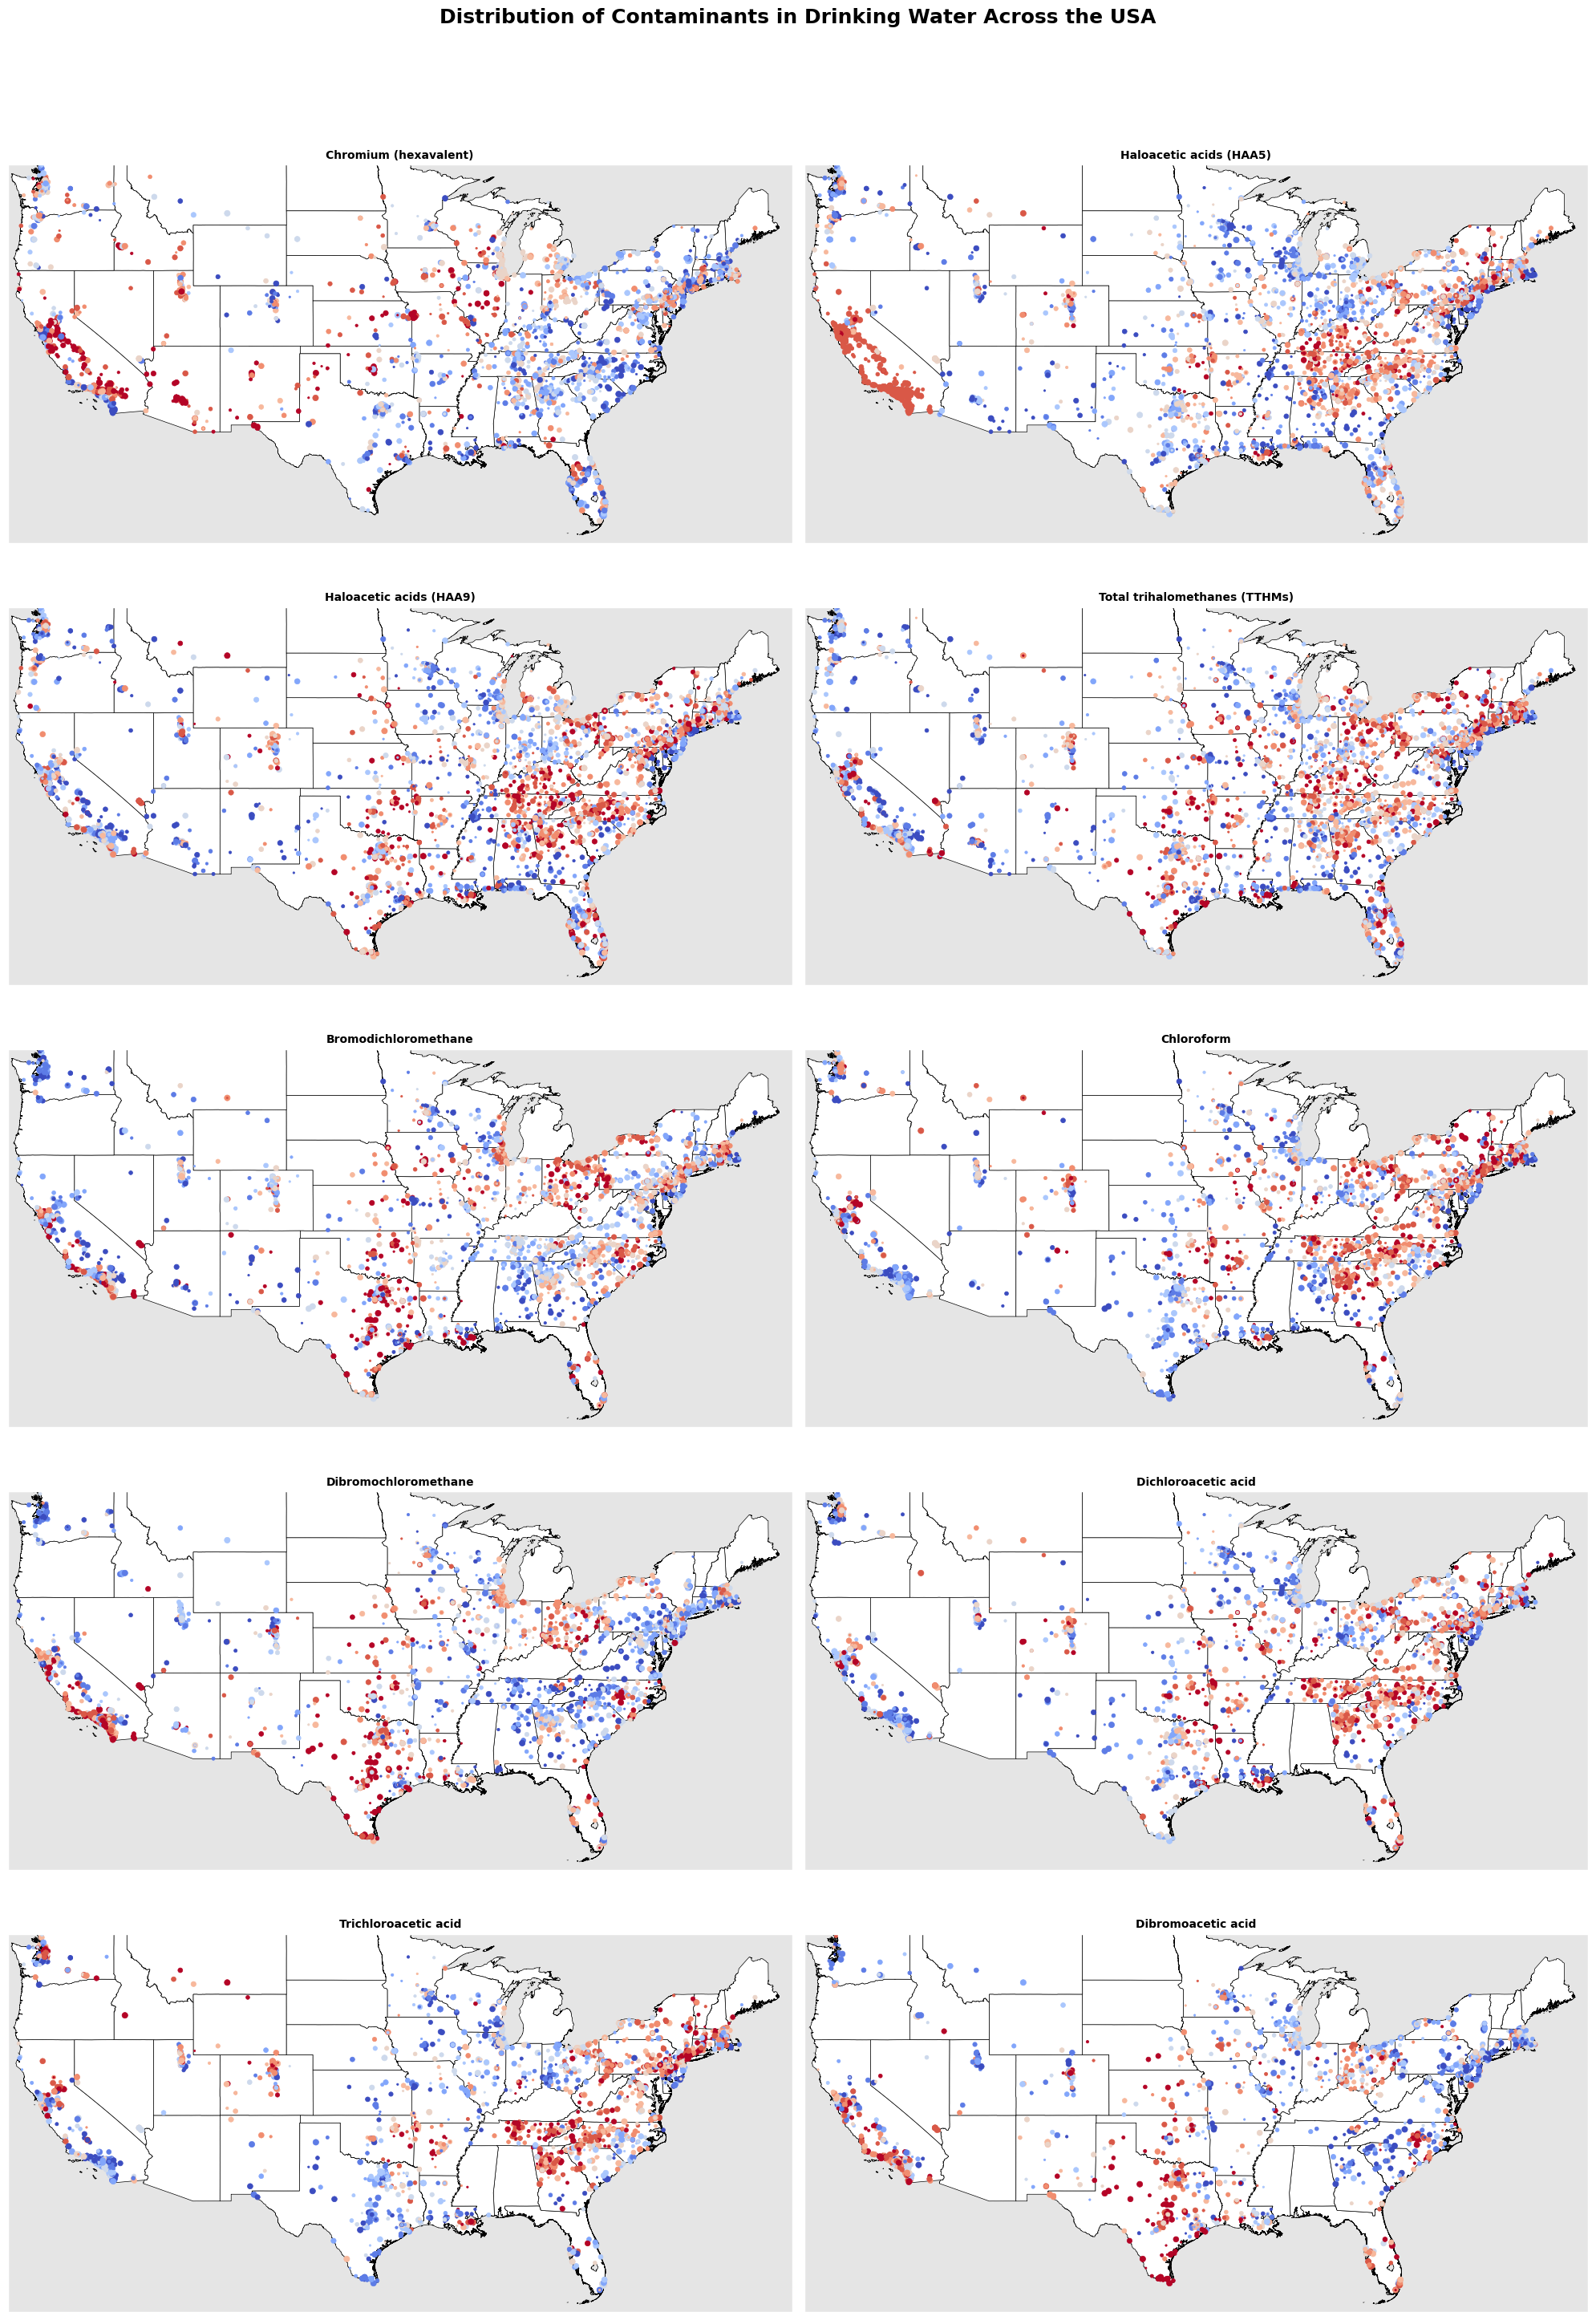

In [6]:
fig,axes=plt.subplots(5,2, figsize=(20,30))
columns=df.filter(like='Contaminant_').columns

for i, (column, ax) in enumerate(zip(columns, axes.ravel()),start=1):
    usa.plot(ax=ax,color='white',ec='black')
    scatter=df.plot.scatter(ax=ax, 
                    x='City Longitude', y='City Latitude', 
                    s=pd.qcut(df['Population'],q=10,labels=False)*3,
                    c=pd.qcut(df[column],q=10,labels=False),cmap='coolwarm',colorbar=False)

    
    ax.set_title(f'{column.split('_')[-1]}',fontweight='bold',size=10)
    ax.set_xlim(-125, -66); ax.set_ylim(24, 49)
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_xlabel(''); ax.set_ylabel('')

    print(f'{i}/{len(columns)}',end='\r')

fig.suptitle('Distribution of Contaminants in Drinking Water Across the USA',fontweight='bold', size=18, y=0.98)
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.show()

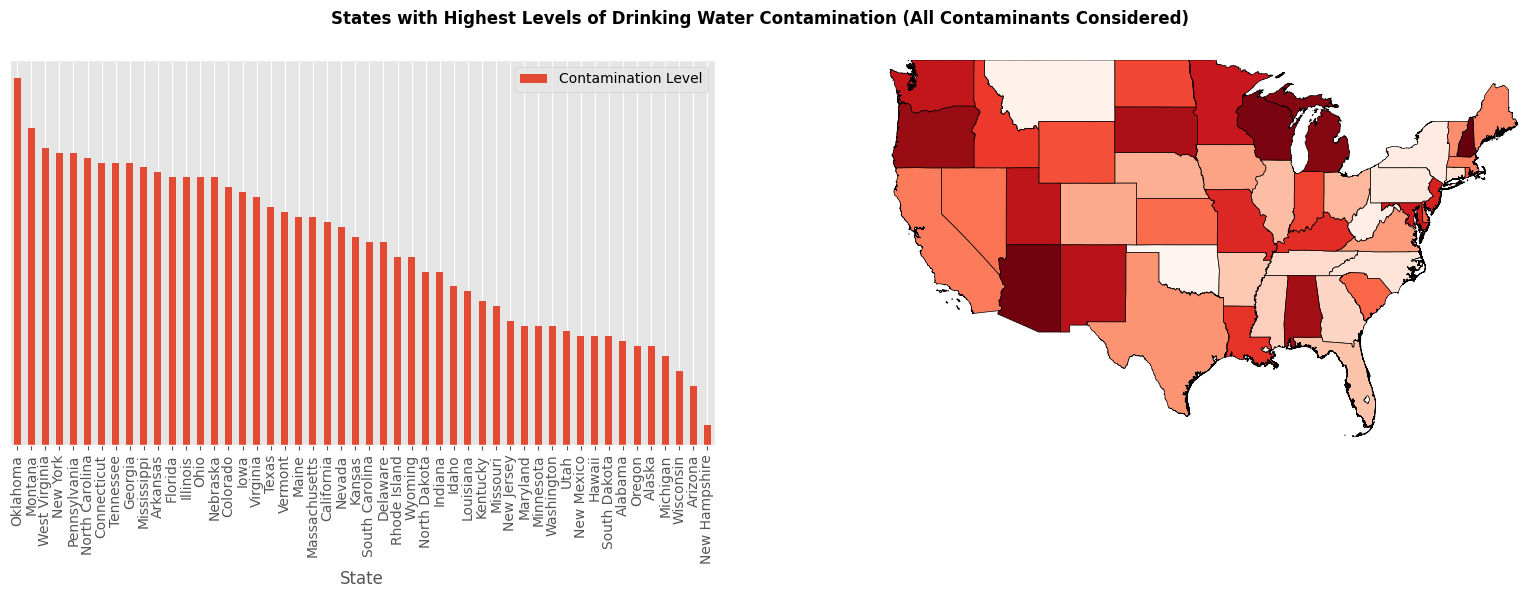

In [7]:
matrix=df.groupby('State')[df.filter(like='Contaminant_').columns].median()

for col in matrix.columns:
    matrix[col]=pd.qcut(matrix[col], q=10, labels=False)

most_polluted_states=matrix.sum(axis=1)
most_polluted_states=usa.merge(most_polluted_states.reset_index(),how='left',left_on='NAME',right_on='State').rename(columns={0:'Contamination Level'})
most_polluted_states=most_polluted_states.dropna(subset='State')
most_polluted_states=most_polluted_states.sort_values(by='Contamination Level',ascending=False)

fig,(ax1, ax2) =plt.subplots(1,2, figsize=(20,5))

most_polluted_states.plot.bar(ax=ax1,x='State',y='Contamination Level')
ax1.set_yticks([])

most_polluted_states.plot(ax=ax2,column='Contamination Level', ec='black',cmap='Reds',color='black')
ax2.set_xlim(-125, -66); ax2.set_ylim(24, 49)
ax2.axis('off')

fig.suptitle('States with Highest Levels of Drinking Water Contamination (All Contaminants Considered)',fontweight='bold')

plt.show()